In [1]:
# Importa las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import corner
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Carga los datos e imprime las llaves
datos = pd.read_csv('Cars93.csv')
keys = np.array(datos.keys()[1:])
print('las llaves son: ',keys)

# Verifica que no haya datos nulos
print(datos.isnull().sum()) #Hay datos nulos pero porque ese atributo no aplica


# Modifica unos de los que son de tipo String a tipo int

# Para el drivetrain
datos['DriveTrain']=datos['DriveTrain'].replace(['Front','4WD','Rear'],[1,2,3])
print('DriveTrain:',np.unique(datos['DriveTrain'],return_counts=True))

#Para los cilindros
datos['Cylinders']=datos['Cylinders'].replace('rotary',0)
datos['Cylinders']=datos['Cylinders'].astype(int)
print('Cylinders:',np.unique(datos['Cylinders'],return_counts=True))

#Para la transmision manual
datos['Man.trans.avail']=datos['Man.trans.avail'].replace(['Yes','No'],[0,1])
print('Man.trans.avail:',np.unique(datos['Man.trans.avail'],return_counts=True))

#Para el tipo
datos['Type']=datos['Type'].replace(['Small','Midsize','Compact','Large','Sporty','Van'],[1,2,3,4,5,6])
print('Type:',np.unique(datos['Type'],return_counts=True))

#Para el tipo
datos['AirBags']=datos['AirBags'].replace(['Driver only','Driver & Passenger','None'],[1,2,3])
print('AirBags:',np.unique(datos['AirBags'],return_counts=True))

#Para el origen
datos['Origin']=datos['Origin'].replace(['USA','non-USA'],[0,1])
print('Origin:',np.unique(datos['Origin'],return_counts=True))

las llaves son:  ['Manufacturer' 'Model' 'Type' 'Min.Price' 'Price' 'Max.Price' 'MPG.city'
 'MPG.highway' 'AirBags' 'DriveTrain' 'Cylinders' 'EngineSize'
 'Horsepower' 'RPM' 'Rev.per.mile' 'Man.trans.avail' 'Fuel.tank.capacity'
 'Passengers' 'Length' 'Wheelbase' 'Width' 'Turn.circle' 'Rear.seat.room'
 'Luggage.room' 'Weight' 'Origin' 'Make']
Unnamed: 0             0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin

In [3]:
# Selecciona las X y sus objetivos Y, ademas remueve los precios
X_all = np.setdiff1d(keys, ['Min.Price','Max.Price','Price']) #Quedan en orden alfabetico 
Y = ['Price'] 

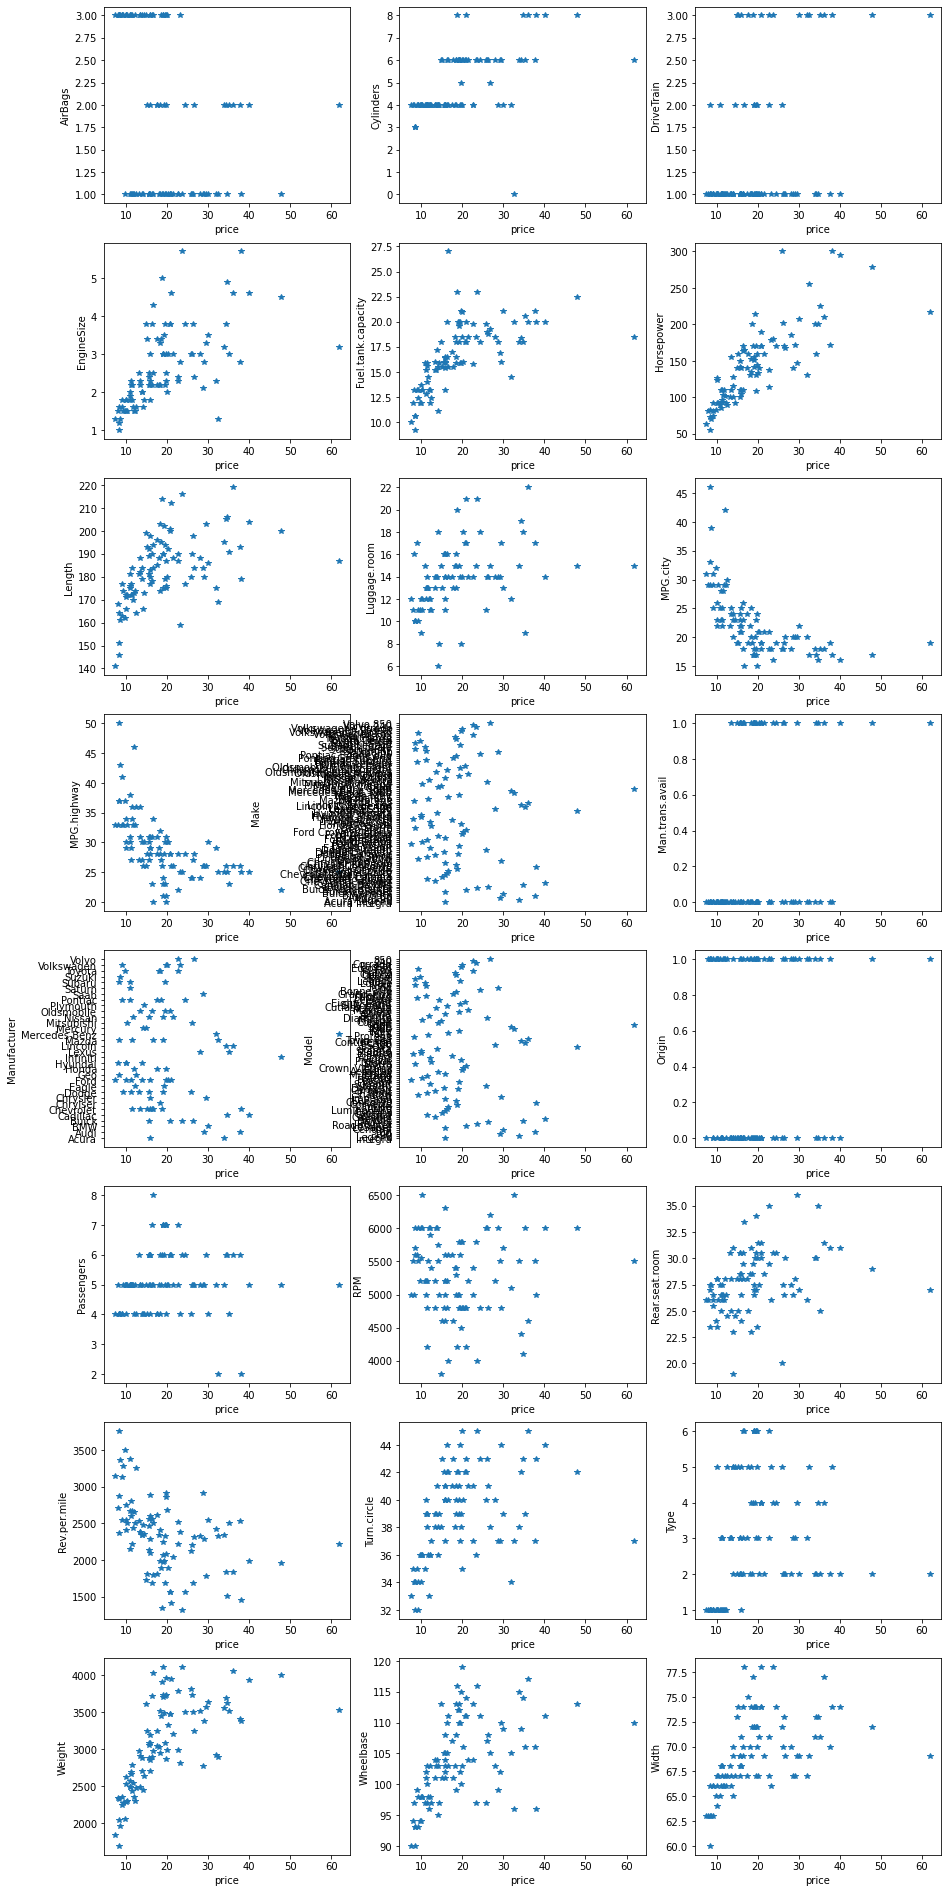

In [4]:
#Hace graficas de todos los atributos de un carro con respecto a su precio
fig, ax = plt.subplots(8,3,figsize=(15,34))
a,b=0,0
for x in X_all:
    ax[b,a].plot(datos[Y],datos[x],'*')
    ax[b,a].set(xlabel='price', ylabel=x)
    a+=1
    if a%3==0:
        b+=1
        a=0

En varias de las caracteristicas podemos ver que no hay una clara relación entre el atributo y el precio, como lo es el caso de quién los manufactura, quién los hace o el modelo del carro, teniendo en la cuenta que estos solo son tipos/nombres y no dan información del rendimiento o de las características del carro no las vamos a tener en la cuenta. Para poder comparar vamos a quitar 'Make','Model','Manufacturer','Luggage.room' y 'Rear.seat.room' para evitar errores y disminuir la complejidad. De los cuales vamos a suponer que los caballos de fuerza y la cantidad de cilindros van a ser los que más afectan el precio del carro

(array([ 7.4,  8. ,  8.3,  8.4,  8.6,  9. ,  9.1,  9.2,  9.8, 10. , 10.1,
       10.3, 10.9, 11.1, 11.3, 11.4, 11.6, 11.8, 12.1, 12.2, 12.5, 13.3,
       13.4, 13.5, 13.9, 14. , 14.1, 14.4, 14.9, 15.1, 15.6, 15.7, 15.8,
       15.9, 16.3, 16.5, 16.6, 17.5, 17.7, 18.2, 18.4, 18.5, 18.8, 19. ,
       19.1, 19.3, 19.5, 19.7, 19.8, 19.9, 20. , 20.2, 20.7, 20.8, 20.9,
       21.5, 22.7, 23.3, 23.7, 24.4, 25.8, 26.1, 26.3, 26.7, 28. , 28.7,
       29.1, 29.5, 30. , 31.9, 32.5, 33.9, 34.3, 34.7, 35.2, 36.1, 37.7,
       38. , 40.1, 47.9, 61.9]), array([1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))
(array([1., 2., 3.]), array([33, 33, 27]))


Text(0, 0.5, 'Conteos')

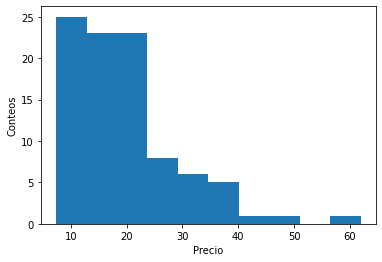

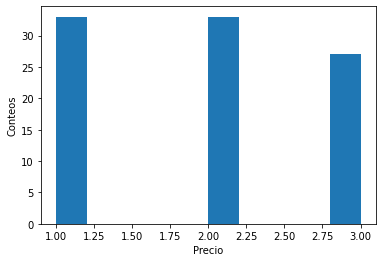

In [5]:
# Quitemos las llaves de quién los manifactura, quién los hace o el modelo del carro
# Llaves de los atributos que se van a usar
X_comp = np.setdiff1d(keys, ['Min.Price','Max.Price','Price','Make','Model','Manufacturer','Luggage.room','Rear.seat.room'])
price = np.array(datos[Y])
print(np.unique(price,return_counts=True)) #la cantidad de elementos que tiene cada precio  

# Hace histograma con los precios de los carros
plt.figure()
plt.hist(price)
plt.xlabel('Precio')
plt.ylabel('Conteos')

#Como los precios varian bastante vamos a dividirlos en 3 rangos, 1=bajo, 2=medio, 3=alto 
#El rango que se utilizó en este caso se uso de tal forma que haya mas o menos el mismo peso en cada valor

price[price<15]=1
price[np.where((price>=15) & (price<21))]=2
price[price>=21]=3
print(np.unique(price,return_counts=True)) #la cantidad de elementos que tiene cada rango

# Hace histograma con los grupos de precios de los carros
plt.figure()
plt.hist(price)
plt.xlabel('Precio')
plt.ylabel('Conteos')


In [6]:
#Relaciona las diferentes categorias y los escala
datos_scaled = StandardScaler().fit_transform(datos[X_comp])
#En este caso no se va a buscar relacionar ya que son muy pocos datos para poder ver un contour y se 
#demoraria mucho por la cantidad de caracteristicas. Para esto vaya a el notebook carros_5
#figure = corner.corner(datos_scaled, labels=X_comp, quantiles=[0.16,0.5,0.84], show_titles=True)

Acá nos podemos dar cuenta que tenemos muy pocos datos para poder encontrar una relación directa entre las caracteristicas. Es por esto que por lo general se usan más datos

In [9]:
# Split train/valid/test
X_train, X_test, Y_train, Y_test = train_test_split(datos[X_comp],price)
print(np.shape(datos[X_comp]), np.shape(X_test), np.shape(X_train))

# Carga el metodo de bosque aleatorio
model = RandomForestClassifier(n_estimators=100,max_depth=10)

# Entrena el modelo
model.fit(X_train,np.ravel(Y_train))

# Predice los valores
Y_pred = model.predict(X_test)

# Dice que tan accurate es
acc = sum(Y_pred==np.ravel(Y_test))/len(Y_test)
print('tiene una accuracy de: ',acc)


(93, 19) (24, 19) (69, 19)
tiene una accuracy de:  0.7916666666666666


In [10]:
# Dice la importancia de cada caracteristica
importances = model.feature_importances_
ii = np.argsort(importances)[::-1]
{np.array(X_comp)[i]:importances[i] for i in ii}

{'Weight': 0.1162992108014111,
 'Horsepower': 0.1098394977237816,
 'Fuel.tank.capacity': 0.09643446107494584,
 'MPG.city': 0.08037209092896669,
 'EngineSize': 0.07347865254091042,
 'Turn.circle': 0.07169565081517555,
 'Width': 0.07076151762599119,
 'MPG.highway': 0.06595324748866456,
 'Wheelbase': 0.0444523636534333,
 'Length': 0.043331605331747,
 'Type': 0.04104926152910966,
 'Origin': 0.0396953457097903,
 'RPM': 0.03500032421447239,
 'Rev.per.mile': 0.03236315755148695,
 'AirBags': 0.026323326926344332,
 'Passengers': 0.02135379295048269,
 'DriveTrain': 0.014057141479442828,
 'Cylinders': 0.009575763309904619,
 'Man.trans.avail': 0.007963588343939062}

Como se supuso al inicio los caballos de fuerza de un carro es una de las caracteristicas principales para el costo del mismo, sin embargo la más importante es el peso. Sin embargo, la cantidad de cilindros resultaron una de las menos importantes, junto con el origen y si tiene o no transmisión manual. 